# MPS vs CPU

While we wait for our previous model to train, let's explore the performance difference betwen using the `mps` device and the `cpu`.

In [1]:
import matplotlib.pyplot as plt
import random
import timeit
import torch
import torch.nn.functional as F

%matplotlib inline

mps_device = torch.device("mps")
cpu_device = torch.device("mps")
print(f'{mps_device=},{cpu_device=}')

mps_device=device(type='mps'),cpu_device=device(type='mps')


In [2]:
x = torch.ones(50000, device="mps")
time = timeit.timeit(lambda: x * random.randint(0,100), number=10000)
time

0.4119477920000003

In [3]:
x = torch.ones(50000, device="cpu")
time = timeit.timeit(lambda: x * random.randint(0,100), number=10000)
time

0.1251851249999998

In [4]:
x = torch.ones(50000000, device="mps")
time = timeit.timeit(lambda: x * random.randint(0,100), number=10000)
time

11.150144

In [5]:
x = torch.ones(50000000, device="cpu")
time = timeit.timeit(lambda: x * random.randint(0,100), number=10000)
time

78.781756959

In [6]:
vector_exps = torch.linspace(1, 7, 40)
vector_sizes = 10**vector_exps
vector_sizes = vector_sizes.int()

mps_times, cpu_times = [], []

for vector_size in vector_sizes:
    mps_x = torch.ones(vector_size.item(), device="mps")
    mps_times.append(timeit.timeit(lambda: mps_x * random.randint(0,100), number=10000))
    
    
    cpu_x = torch.ones(vector_size.item(), device="cpu")
    cpu_times.append(timeit.timeit(lambda: cpu_x * random.randint(0,100), number=10000))

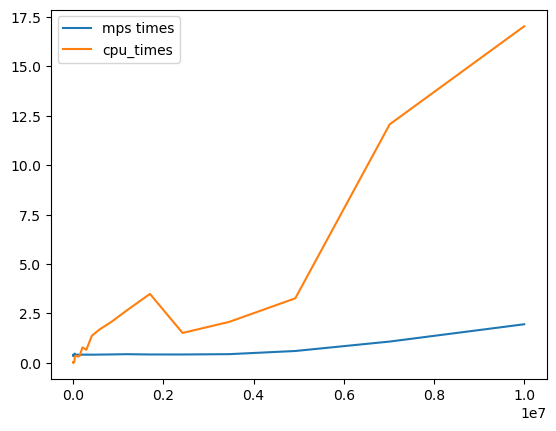

In [7]:
plt.plot(vector_sizes, mps_times, label='mps times')
plt.plot(vector_sizes, cpu_times, label='cpu_times')
plt.legend()
plt.show()

Looks like we're almost always better off using mps, only on super small vectors is the cpu faster. Good to know!